In [ ]:
### Isaac Newton

Za uvod nekaj zanimivosti iz Newtonovega življenja.

![Leonardo](images/Leonardo_Annunciazione.jpg)



<!-- ![Gregorijanski](images/Gregoriancalendarleap_solstice.svg) -->

1642 - 1726 ali 1643 - 1727?

Velika Britanija uvede gregorijanski koledar in začetek novega leta kot 1. januar šele leta 
<a href='http://www.historytoday.com/richard-cavendish/gregorian-calendar-adopted-england'>1752</a>.


25 December 1642 – 20 Marec 1726 (os) -> 4 Januar 1643 – 31 Marec 1727 (ns)

Robert Hooke
![Hooke by Rita Greer](images/Robert_Hooke.jpg)

Animacija Newtonove metode:

![animacija](images/NewtonIteration_Ani.gif)

LaTeX example: $x^2 + y^2 = z^2$  

another: $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

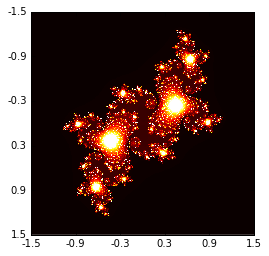

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Image width and height; parameters for the plot
im_width, im_height = 500, 500
c = complex(-0.1, 0.65)
zabs_max = 10
nit_max = 1000
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

julia = np.zeros((im_width, im_height))
for ix in range(im_width):
    for iy in range(im_height):
        nit = 0
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,
                    iy / im_height * yheight + ymin)
        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**2 + c
            nit += 1
        shade = 1-np.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[ix,iy] = ratio

fig, ax = plt.subplots()
ax.imshow(julia, interpolation='nearest', cmap=cm.hot)
# Set the tick labels to the coordinates of z0 in the complex plane
xtick_labels = np.linspace(xmin, xmax, xwidth / 0.5)
ax.set_xticks([(x-xmin) / xwidth * im_width for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])
ytick_labels = np.linspace(ymin, ymax, yheight / 0.5)
ax.set_yticks([(y-ymin) / yheight * im_height for y in ytick_labels])
ax.set_yticklabels(['{:.1f}'.format(ytick) for ytick in ytick_labels])
plt.show()

In [6]:
import sys

def f(x):
	return x**3 + x - 1
	
def f_prime(x):
	return 3*x**2 + 1

def newt(x,n):
	for i in range(n):
		if f_prime(x) == 0:
			return x
		x = x - f(x)/f_prime(x)
	return x
	

print(newt(1.1, 50))



0.6823278038280193


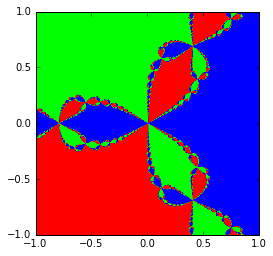

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import math as mth

# The function used to generate the fractal.
def f(x):
    return ((x)**(3)-1)

# The derivative of the above function.
def fd(x):
    return (3*x**(2))
    
def roots():
    return np.array([1,0,0,-1])
    
"""
step = 0.00390625
"""
step = 0.00390625
multval = int(1/step)

rootar = np.roots(roots())
root1 = rootar[0]
root2 = rootar[1]
root3 = rootar[2]

newx = []
newy = []
newz = []
newr = []
colors = [[0 for x in range(multval*2)] for x in range(multval*2)]

def newton(f, fd, x):
    f_temp = f(x)
    fd_temp = fd(x)
    xk = 0
    while 1:
        if ((fd_temp)==0):
            newr.append(0)
            return 0
        dx = f_temp / (fd_temp)
        if abs(dx) < 10e-3 * (1 + abs(x)):
            if(np.abs((root1-(x-dx)))<10e-3):
                rootval = 1
            if(np.abs((root2-(x-dx)))<10e-3):
                rootval = 2
            if(np.abs((root3-(x-dx)))<10e-3):
                rootval = 3
            newr.append(rootval)
            return rootval
        x = x - dx
        f_temp = f(x)
        fd_temp = fd(x)
        xk = xk + 1

def frange2(start, stop, step, r):
    l = start
    while l < stop:
        newx.append(r)
        newy.append(l)
        z = complex(r,l)
        newz.append(z)
        newton(f,fd,z)
        l += step

def frange(start, stop, step):
    r = start
    count = 0
    while r < stop:
        frange2(start, stop, step, r)
        count += 1
        r += step

frange(-1,1,step)

rangeval = multval*4*multval        

for i in range(0,rangeval):
        x_value = int((newx[i]+1)*multval)
        y_value = int((newy[i]+1)*multval)
        if(newr[i]==0):
            colors[y_value][x_value] = [0.0, 0.0, 0.0]
        if(newr[i]==1):
            colors[y_value][x_value] = [1.0, 0.0, 0.0]
        if(newr[i]==2):
            colors[y_value][x_value] = [0.0, 1.0, 0.0]
        if(newr[i]==3):
            colors[y_value][x_value] = [0.0, 0.0, 1.0]

delta = step
x_g = y_g = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x_g, y_g)

im = plt.imshow(colors, interpolation='bilinear', cmap=cm.RdYlGn, origin='upper', extent=[-1,1,-1,1])

plt.show()

### Kantorjeva množica




Kantorjeva množica $C$ je definirana kot
\begin{align*}
  C_0&=[0,1],\\
  C_1&=[0,\tfrac13]\cup [\tfrac23,1],\\
  C_2&=[0,\tfrac19]\cup [\tfrac29,\tfrac13]\cup [\tfrac23,\tfrac79]\cup [\tfrac89,1],\\[-6pt]
  &\ \,\vdots\\[-12pt]
  C&=\bigcap_{n=0}^\infty C_n.
\end{align*}

Ker velja
$C_n=\{0.d_1d_2d_3\dots\colon {d_j\in \{0,2\}}$ za $1\leq j\leq n$}, je množica realnih števil v intervalu $[0,1]$, ki imajo trojiški  zapis samo v števkah $0$ in $2$ na prvih $n$ mestih. Tako je $C$ množica vseh števil v intervalu $[0,1]$, ki imajo vsaj en trojiški zapis samo z $0$-lami and
$2$-kami. 

Kantorjeva množica je 
- neštevna (diagonalni argument)
- perfektna
- popolnoma nepovezana
- ima Lebesgueovo mero 0
- nikjer gosta

Velja zanimiv izrek:


Interval $[0,1]$ je zvezna slika Kantorjeve množice.
Definiramo $f: C \to [0,1]$ kot 
$$f(\sum_{k \in N}\frac{a_k}{3^k})=\sum_{k \in N}\frac{c_k}{2^k}$$


In posplošitev:
Vsak kompakten metričen prostor je zvezna slika Kantorjeve množice.





Definicija: Iterativni funkcijski sistem (IFS) je definiran kot kot končni niz $(T_i)_{i=1}^n$, tako da velja
$$ T(A) = T_1(A) \cup T_2(A) \cup \dots \cup T_n(A) $$

*Primer 1*  
Na intervalu $[0,1]$ naj bo $T_1 = \frac{x}{3}$ in $T_2 = \frac{x}{3} + \frac{2}{3}$. Potem je $\{T_1, T_2\}$ IFS za Kantorjevo množico.

*Primer 2*  
Na enotskem kvadratu definiramo: 
$$ T_1(x,y) = (x/2, y/2), $$
$$ T_2(x,y) = (x/2 + 1/2, y/2), $$
$$ T_3(x,y) = (x/2 + 1/2, y/2 + 1/2) $$
in dobimo *trikotnik Sierpinskega*.





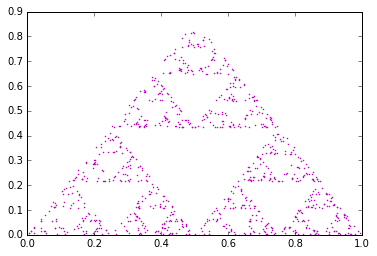

In [9]:
import numpy as np
import pylab
from random import randint

def midpoint(point1, point2):
    return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]

curr_point = [0,0]  # our seed value for the chaos game
                    # It can fall anywhere inside the triangle

# our equilateral triangle vertices
v1 = [0,0]
v2 = [1,0]
v3 = [.5,np.sqrt(3)/2]

# Plot 5000 points
for _ in range(1000):
    # choose a triangle vertex at random
    # set the current point to be the midpoint
    # between the previous current point and
    # the randomly chosen vertex
    val = randint(0,2)
    if val == 0:
        curr_point = midpoint(curr_point, v1)
    if val == 1:
        curr_point = midpoint(curr_point, v2)
    if val == 2:
        curr_point = midpoint(curr_point, v3)
    # plot the new current point
    pylab.plot(curr_point[0],curr_point[1],'m.',markersize=2)

pylab.show()

### Benoît Mandelbrot


Po francoskem Grand Prix-u je prišlo do polstoletnega stagniranja, vse dokler niso računalniki postali tako zmogljivi, da so se lahko prikazovale slike Fatoujevih and juliajevih množic. Najbolj zaslužen za to je Benoit Mandelbrot. Zanimivo, da mu je idejo dal njegov stric, Szolem Mandelbrojt, profesor matematike v Parizu. Torej še vedno 'francoska povezava', pe toliko bolj, ker je bil njegov (stričev) doktorski mentor Jacques Hadamard.
Definicija Mandelbrotove množice je pravzprav kratka in enostavna:  

To je množica vrednosti $c$ v kompleksni ravnini, za katere je orbita $0$ pod iteracijo kvadratne funkcije 
$$ z_{n+1} = z_n^2 + c$$
omejena.



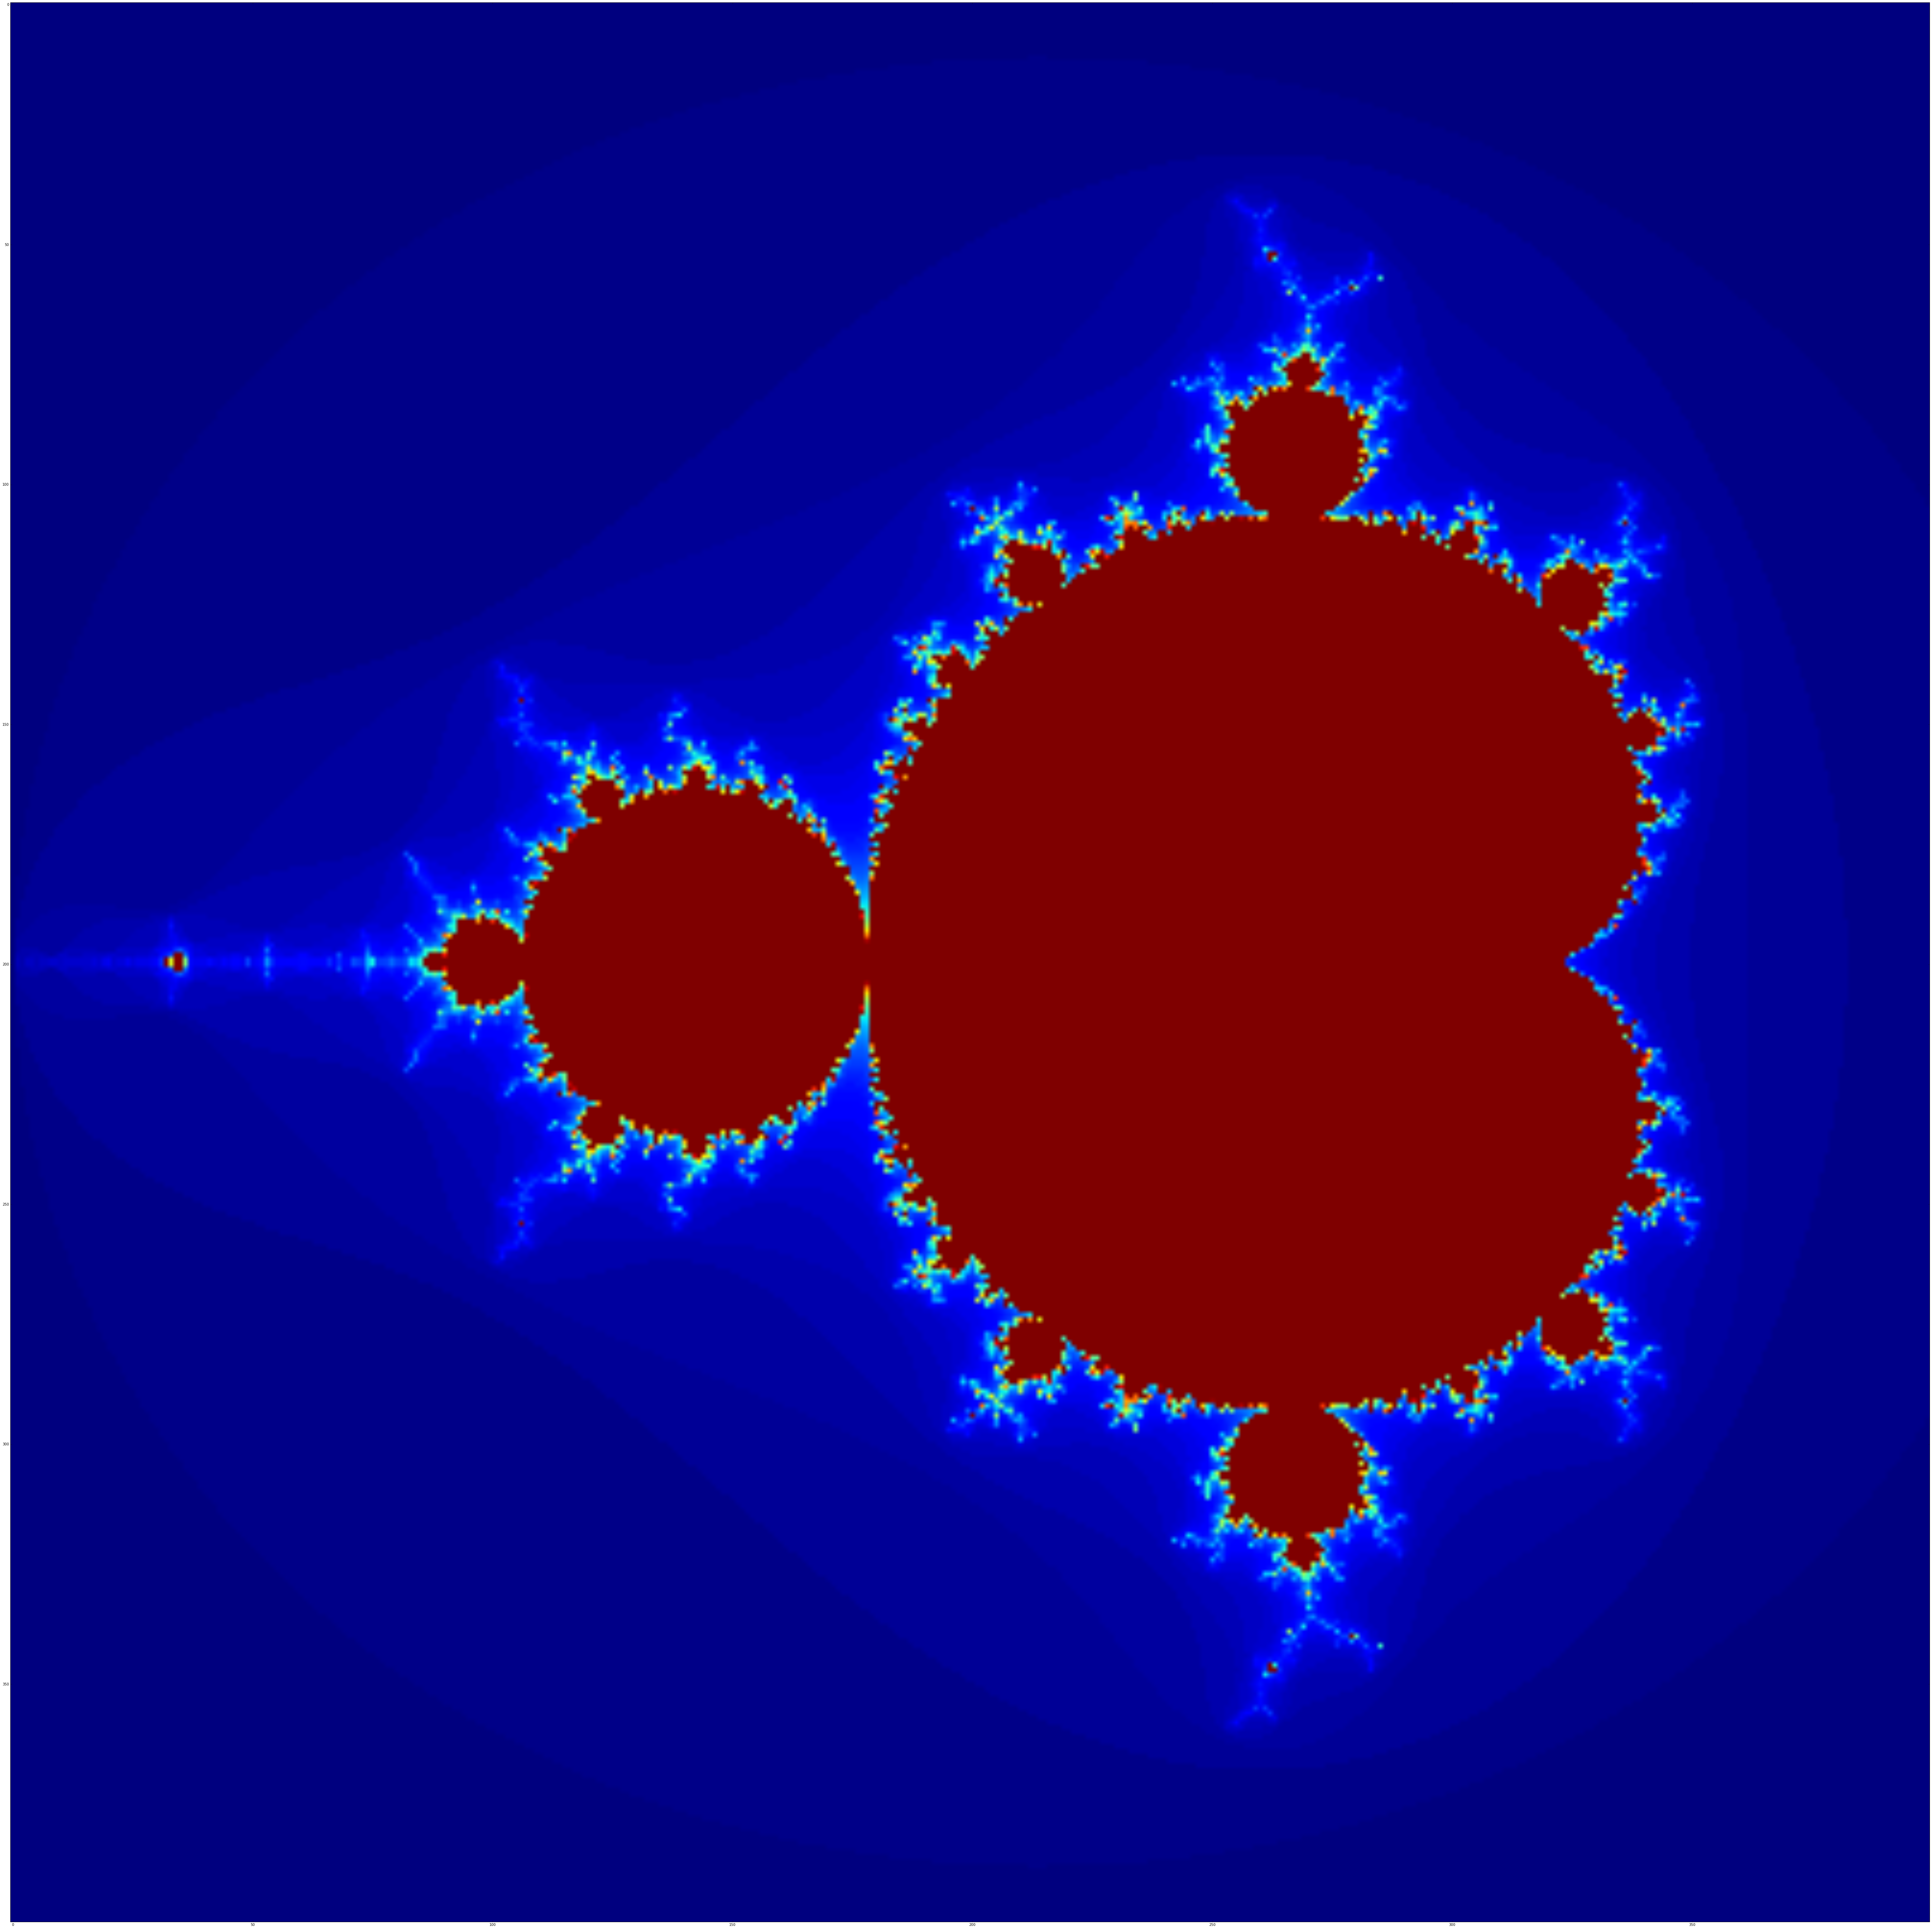

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=100 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

plt.figure(figsize=(100, 100))
plt.imshow(mandelbrot(400, 400))
plt.show()

